#Import libaries

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import warnings
import calendar
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.compose import make_column_selector
from matplotlib import cm
c1=cm.get_cmap('Accent')
c2=cm.get_cmap('twilight')

#Read Data

In [2]:
data1=pd.read_excel("/content/CustomersData.xlsx")
data2=pd.read_csv("/content/Discount_Coupon.csv")
data3=pd.read_csv("/content/Marketing_Spend.csv")
data4=pd.read_csv("/content/Online_Sales.csv")
data5=pd.read_excel("/content/Tax_amount.xlsx")

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [5]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [6]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [7]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


Transform data

In [8]:
data6=data1.merge(data4,on='CustomerID')
data7=data6.merge(data5,on='Product_Category')
data2["Month"]=data2['Month'].apply(lambda x: dt.datetime.strptime(x, '%b').month)
data7=data7.merge(data3,left_on='Transaction_Date',right_on='Date')
data7.Transaction_Date=pd.to_datetime(data7.Transaction_Date,format='%m/%d/%Y')
data7['Month']=data7.Transaction_Date.apply(lambda x : x.strftime('%m'))
data7.Month=data7.Month.astype('int')
data7=data7.merge(data2,on=['Month','Product_Category'],how='outer')
data7=data7.dropna()
data7.Month.info()

<class 'pandas.core.series.Series'>
Int64Index: 52524 entries, 0 to 52923
Series name: Month
Non-Null Count  Dtype
--------------  -----
52524 non-null  int64
dtypes: int64(1)
memory usage: 820.7 KB


In [9]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  float64       
 1   Gender               52524 non-null  object        
 2   Location             52524 non-null  object        
 3   Tenure_Months        52524 non-null  float64       
 4   Transaction_ID       52524 non-null  float64       
 5   Transaction_Date     52524 non-null  datetime64[ns]
 6   Product_SKU          52524 non-null  object        
 7   Product_Description  52524 non-null  object        
 8   Product_Category     52524 non-null  object        
 9   Quantity             52524 non-null  float64       
 10  Avg_Price            52524 non-null  float64       
 11  Delivery_Charges     52524 non-null  float64       
 12  Coupon_Status        52524 non-null  object        
 13  GST                  52524 non-

In [10]:
data7.duplicated().value_counts()

False    52524
dtype: int64

In [11]:
data7=data7.drop_duplicates()

In [12]:
data7=data7.drop_duplicates()

In [13]:
data7['Total Prices']=data7.Avg_Price+data7.Delivery_Charges

In [14]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52923
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  float64       
 1   Gender               52524 non-null  object        
 2   Location             52524 non-null  object        
 3   Tenure_Months        52524 non-null  float64       
 4   Transaction_ID       52524 non-null  float64       
 5   Transaction_Date     52524 non-null  datetime64[ns]
 6   Product_SKU          52524 non-null  object        
 7   Product_Description  52524 non-null  object        
 8   Product_Category     52524 non-null  object        
 9   Quantity             52524 non-null  float64       
 10  Avg_Price            52524 non-null  float64       
 11  Delivery_Charges     52524 non-null  float64       
 12  Coupon_Status        52524 non-null  object        
 13  GST                  52524 non-

In [15]:
data=data7
new=data[['Offline_Spend','Online_Spend','Month','Total Prices']].groupby('Month').sum()
mon=list(calendar.month_name)[1:]

# Data visualization

**TOP 20 Costliest Purchase ID's**

Text(0.5, 0, 'Customer ID')

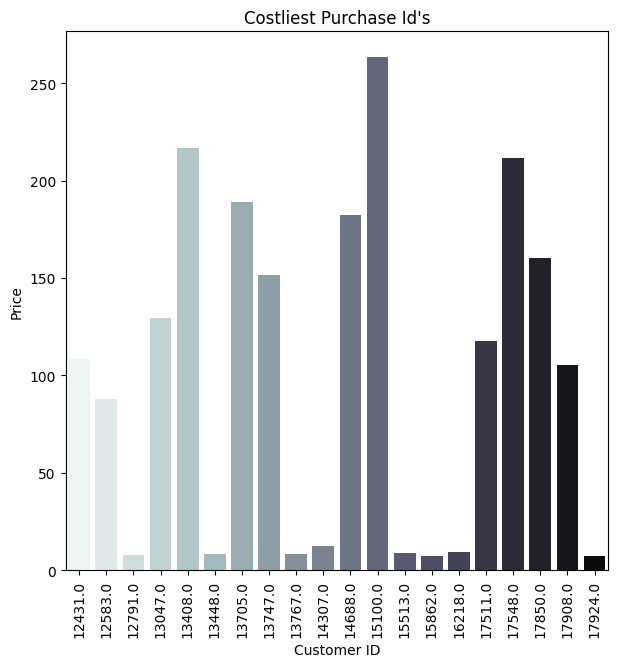

In [16]:
val1=data[['CustomerID','Total Prices']]
x=val1.CustomerID.unique()[:20]
y=val1['Total Prices'].unique()[:20]
fig,axis=plt.subplots(figsize=(7,7))

val1=val1.sort_values(by='Total Prices',ascending=False)
sb.barplot(x=x,y=y,palette='bone_r',ax=axis)
plt.xticks(rotation=90)
plt.title("Costliest Purchase Id's")
plt.ylabel('Price')
plt.xlabel('Customer ID')

**TOP 30 Popular Customer ID With Purchase Count**

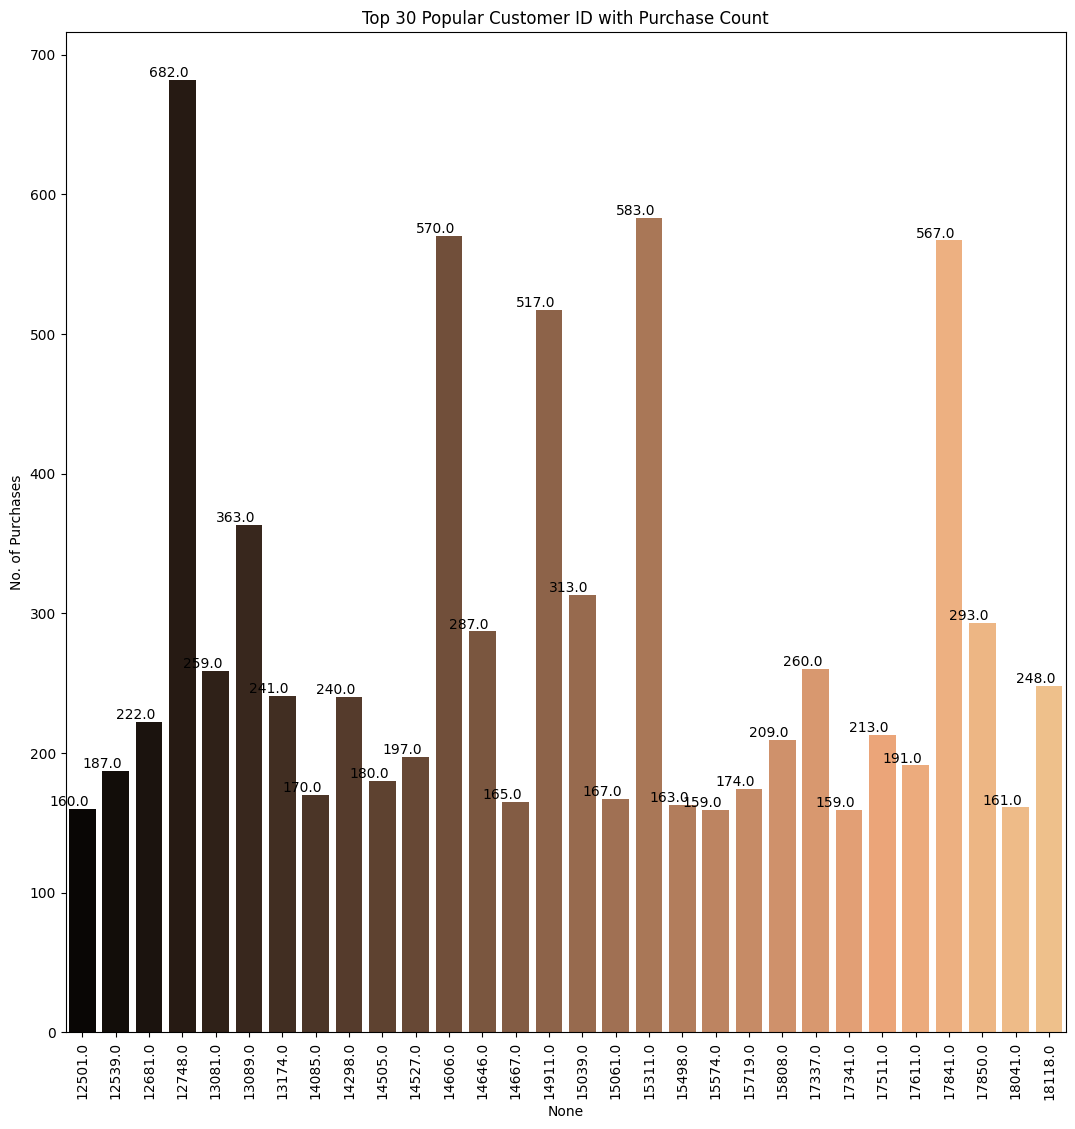

In [17]:
fig=plt.figure(figsize=(10,10))
axis=fig.add_axes([1,1,1,1])
val2=data.CustomerID.value_counts().sort_values(ascending=False).head(30)
sb.barplot(x=val2.index,y=val2,palette='copper',ax=axis)

plt.xticks(rotation=90)
plt.ylabel('No. of Purchases')
plt.title('Top 30 Popular Customer ID with Purchase Count')
for i in axis.patches:
    axis.annotate(i.get_height(),(i.get_x(),i.get_height()),va='bottom',ha='center')

**Total Male-Female Purchase camparison**

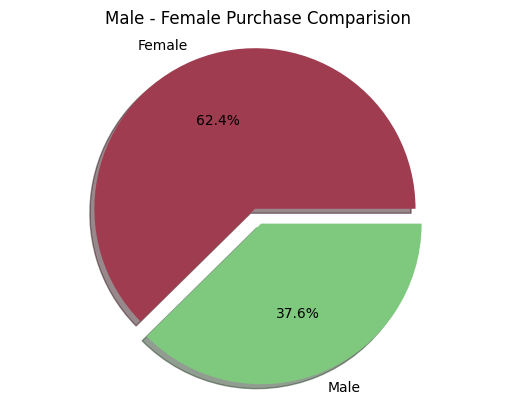

In [18]:
val3=data.Gender.value_counts()
plt.pie(val3,labels=['Female','Male'],autopct="%1.1f%%",shadow=True,explode=(0.1,0),colors=[c2(0.7),c1(0.1)])
plt.axis('equal')
plt.title('Male - Female Purchase Comparision')
sb.set(style='white')

**Tenure Months Frequency Of Customers**

Text(0.5, 1.0, 'Tenure Months Frequency of Customers')

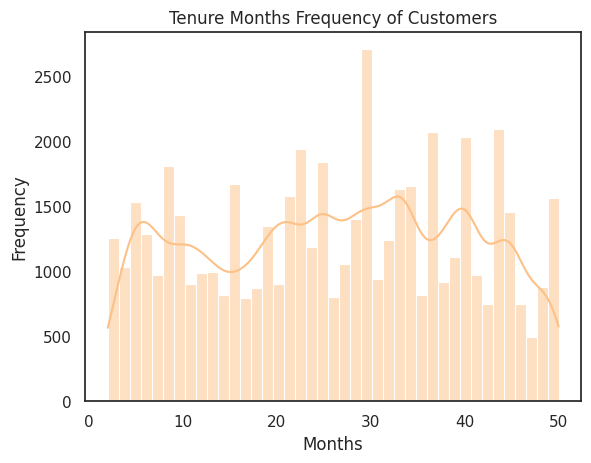

In [19]:
val4=data.Tenure_Months
sb.histplot(val4,kde=True,color=c1(0.3))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Tenure Months Frequency of Customers')

**Product Category Frequency Analysis**

Text(41.875, 0.5, 'Percentages')

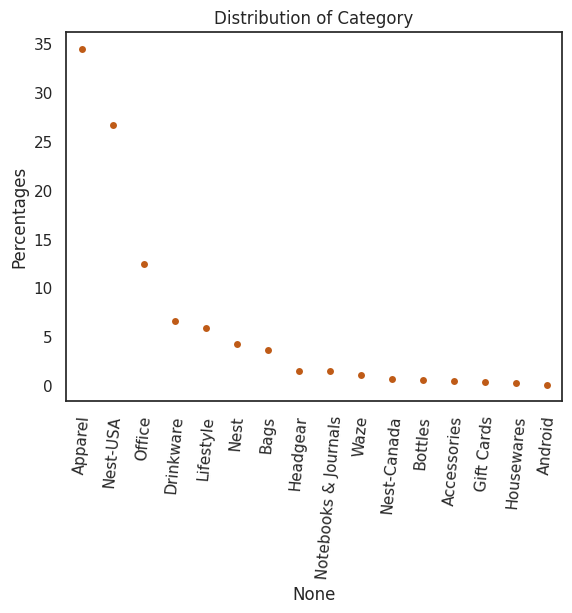

In [20]:
freqdata=data.Product_Category.value_counts()
total=freqdata.sum()
percent=(freqdata.values/total)*100
sb.swarmplot(x=freqdata.index,y=percent,color=c1(0.8))
plt.xticks(rotation=85)
plt.title('Distribution of Category')
plt.ylabel('Percentages')

**Heatmap For Correlation**

Text(0.5, 1.0, 'Heatmap')

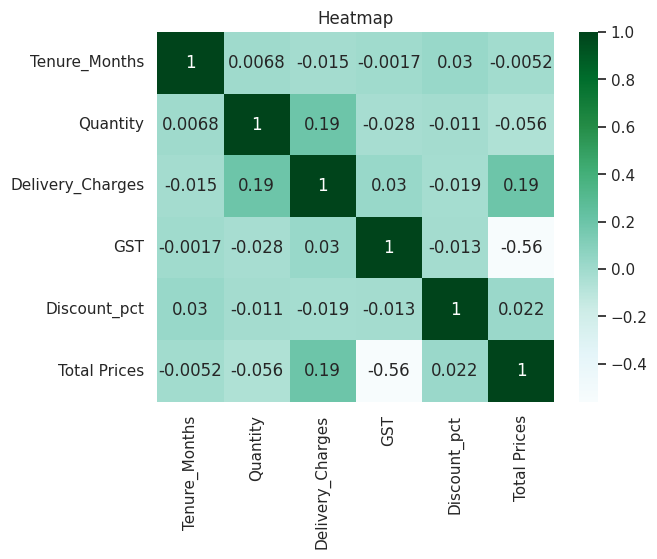

In [21]:
x=make_column_selector(dtype_include=['number'])
newdf=data[x(data)]
newdf.drop(['CustomerID','Transaction_ID','Online_Spend','Month','Offline_Spend','Avg_Price'],axis=1,inplace=True)
sb.heatmap(newdf.corr(),annot=True,cmap='BuGn')
plt.title('Heatmap')

**Location Frequencies**

Text(0.5, 1.0, 'Location Frequencies')

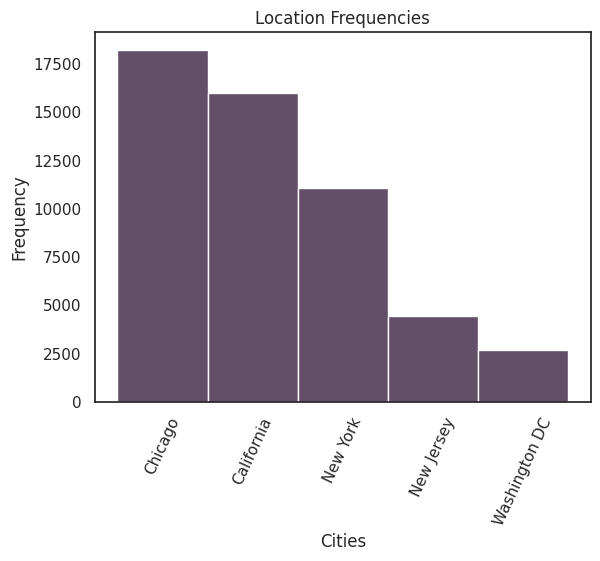

In [22]:
sb.histplot(data.Location,color=c2(0.5))
plt.ylabel('Frequency')
plt.xlabel('Cities')
plt.xticks(rotation=65)
plt.title('Location Frequencies')

**Male-Female Price Spent**

Text(0.5, 1.0, 'Price Spend')

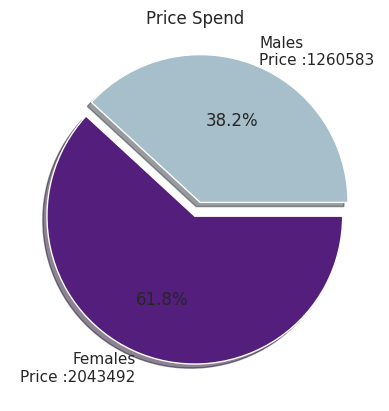

In [25]:
male=data[['Total Prices','Gender']].groupby('Gender').get_group('M')['Total Prices'].sum()
female=data[['Total Prices','Gender']].groupby('Gender').get_group('F')['Total Prices'].sum()
sizes=[round(male),round(female)]
labels=['Males','Females']
plt.pie(sizes,autopct='%1.1f%%',labels=[f'{label}\nPrice :{size}' for label, size in zip(labels, sizes)],shadow=True,explode=(0.1,0),colors=[c2(0.1),c2(0.4)])
plt.title('Price Spend')

In [26]:
nd2=data[['Total Prices','Gender','Location']].groupby('Location')
nd3=[]
nd4=[]
for i in data.Location.unique():
    nd3.append((round(nd2.get_group(i)['Total Prices'].sum()),i))
y=list(map(lambda x :x[0],nd3))
x=list(map(lambda x :x[1],nd3))

**Cities With Price Spent**

Text(0.5, 1.0, 'Cities with Price Spent')

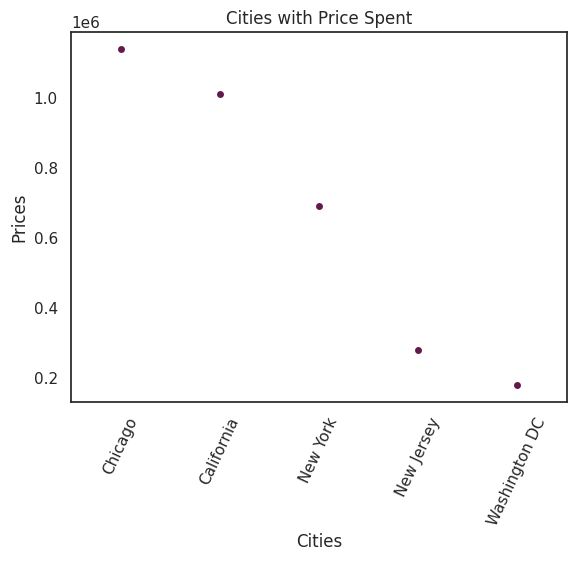

In [27]:
sb.swarmplot(x=x,y=y,color=c2(0.6))
plt.xlabel('Cities')
plt.ylabel('Prices')
plt.xticks(rotation=65)
plt.title('Cities with Price Spent')

**Delivery Charges Vs Average Price**

Text(0.5, 1.0, 'Delivery Charges Vs Avg_Price')

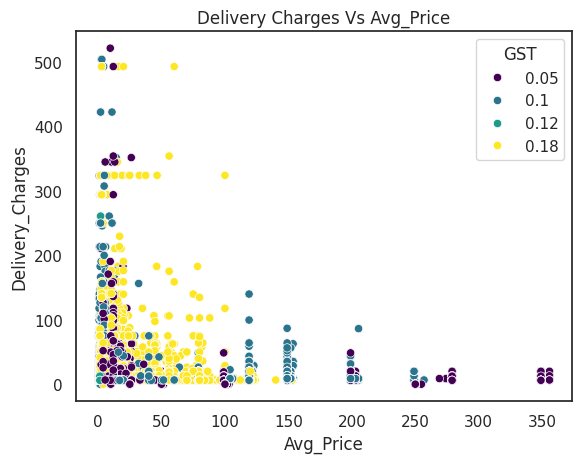

In [28]:
sb.scatterplot(data=data,y='Delivery_Charges',x='Avg_Price',hue='GST',palette='viridis')
plt.title('Delivery Charges Vs Avg_Price')

##Time Series Analaysis



**Total Spend**

Text(0.5, 1.0, 'Total Spend With Month')

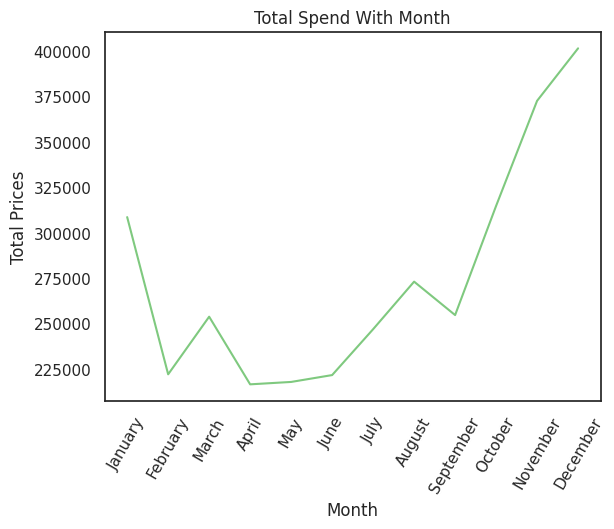

In [29]:
sb.lineplot(y=new['Total Prices'],x=new.index,color=c1(0.1))
plt.xticks(new.index,mon,rotation=60)
plt.title("Total Spend With Month")

**Online spend**

Text(0.5, 1.0, 'Total Online Spend With Month')

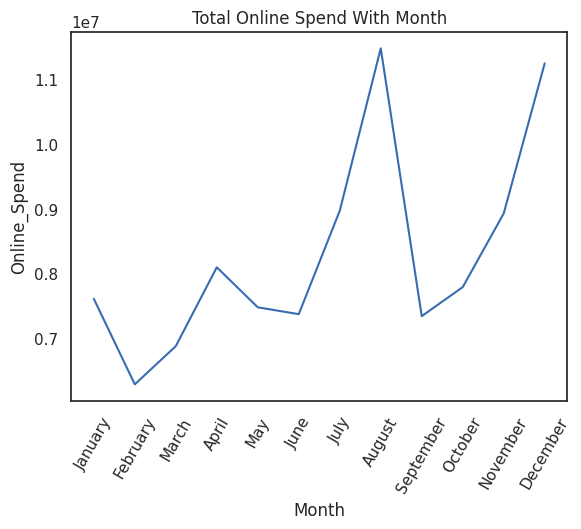

In [30]:
sb.lineplot(y=new.Online_Spend,x=new.index,color=c1(0.5))
plt.xticks(new.index,mon,rotation=60)
plt.title("Total Online Spend With Month")

**Offline spend**

Text(0.5, 1.0, 'Total Offline Spend With Month')

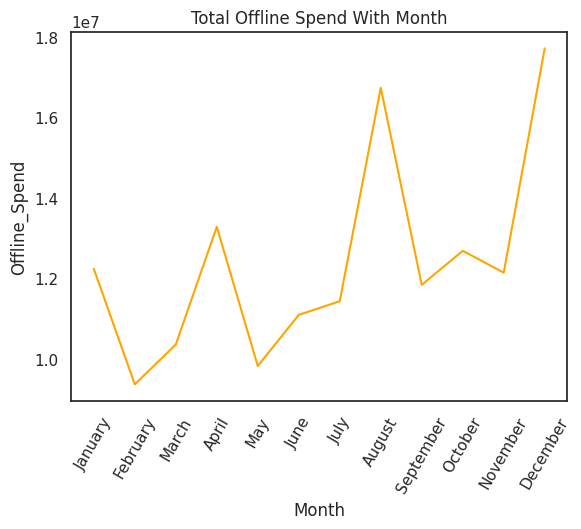

In [31]:
sb.lineplot(y=new.Offline_Spend,x=new.index,color='orange')
plt.xticks(new.index,mon,rotation=60)
plt.title("Total Offline Spend With Month")

**Total Delivery Charges Per Month**

Text(0.5, 1.0, 'Total Delivery Charges per Month')

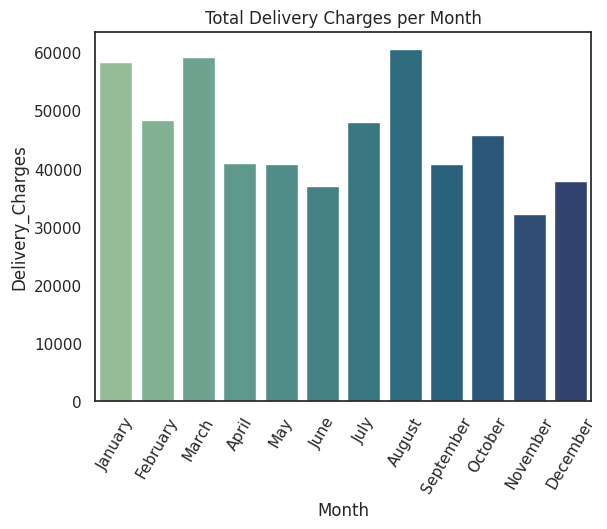

In [32]:
delivery=data[['Delivery_Charges','Month']].groupby('Month').sum()
sb.barplot(data=delivery,x=delivery.index,y='Delivery_Charges',palette='crest')
plt.xticks(range(12),mon,rotation=60)
plt.title("Total Delivery Charges per Month")

# **Thank you**